# Median House Value Prediction

### **Problem Statement**

There is a real estate agent who knows that you are a Machine Learning Engineer and would like you to help build a machine learning model that can predict the price of the house given the information about that particular house.
The idea of creating a model clicked and you replied, "oh yeah, that sounds cool! Let's do it!"
You have understood the problem and probably you already have an idea of the type of models you will use. You know there are so many models such as random forests, decision trees, and neural networks but you have learned that it's always okay to start simple and so, you eventually settled for Linear Regression as this is not a complex problem.

Data Set: https://drive.google.com/file/d/11_NtZ8cyPzCKrQQTagLF1lRApEC9fZpg/view?usp=sharing

----------------------------

### Task: 
Build a Linear Regression Model for House Price prediction.

----------------------------

### This submission will be divided into the following sections:


- Data Vizualization & EDA
- Data Preprocessing
- Building A Machine Learning Model & Making Predictions using either (sklearn or the manual approach)
- Evaluate Performance Of Your Regression Model Using RMSE (Root Mean Squared Error)

----------------------------

### Understanding the Dataset


- **longitude:**  A measure of how far west a house is; a higher value is farther west
- **latitude:**  A measure of how far north a house is; a higher value is farther north
- **housing_median_age:**  Median age of a house within a block; a lower number is a newer building
- **total_rooms:**  Total number of rooms within a block
- **total_bedrooms:**  Total number of bedrooms within a block
- **population:**  Total number of people residing within a block
- **households:** Total number of households, a group of people residing within a home unit, for a block
- **median_income:**  Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- **median_house_value:**  Median house value for households within a block (measured in US Dollars)
- **oceanProximity:**  Location of the house w.r.t ocean/sea

----------------------------

## Let's start by importing the necessary libraries

In [118]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

# Importing libraries for building linear regression model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Load the dataset

In [2]:
# read the data
df = pd.read_csv('testing.csv')
# returns the first 5 rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Observations**

- This dataset has 10 features and 20640 observations or entries. 
- Each row or observation represents one block or district. Here, a block represents an area within which you'll find a number of houses.

## 1. Overview - Understanding the dataset A bit more

In [3]:
df.shape

(20640, 10)

**Observation**
- There are 20640 rows and 10 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observations**

- There are 10 features in this dataset: 9 numerical (float type) features and 1 categorical (object type) feature. 
- 9 out of the 10 features have no null values (that is no missing values), They have values for all the rows in the dataset
- The 'total_bedrooms' attribute has only 20433 non-null values, hence it is missing 207 values. This means that 207 blocks/districts do not have entries for this feature. 

**Taking a closer look at the only categorical feature in the dataset**

In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**Observations**

- The ocean_proximity feature has 5 categories: <1H Ocean, Inland, Near Ocean, Near Bay and Island
- Most of the blocks are in the <1H Ocean category.
- Island has only 5 entries

In [6]:
# Having gotten the counts for each category of the ocean_proximity feature, let's calculate the percentage of each category:
ocean_proximity_col = {'ocean_proximity': ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
        'count': [9136, 6551, 2658, 2290, 5]}
ocean_proximity_perc = pd.DataFrame(ocean_proximity_col)

# Calculate the total count
total_count = ocean_proximity_perc['count'].sum()

# Calculate the percentage for each category
ocean_proximity_perc['percentage'] = (ocean_proximity_perc['count'] / total_count) * 100

# Output the result
ocean_proximity_perc

,ocean_proximity,count,percentage
0,<1H OCEAN,9136,44.263566
1,INLAND,6551,31.739341
2,NEAR OCEAN,2658,12.877907
3,NEAR BAY,2290,11.094961
4,ISLAND,5,0.024225


**Observations**

- 44.3% of the districts/blocks are <1H Ocean from the ocean/sea
- 31.7% of the blocks are inland
- The districts that are Islands make up just 0.02% of our dataset
- Near Ocean and Near Bay make up 12.8% and 11% of our dataset respectively.

**I'll now take a look at the summary statistics of the 9 numerical attributes**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


**Observations**

- The houses in 25% of the blocks in our dataset have an average age that is below 18 years. This means that 25% of the houses are relatively new.
- The average age of the houses for 50% of the blocks is lower than 29 years.
- The average population for each block is around 1425. These are relatively small communities.
- The median income has a lot of outliers. 75% of the median income are under 47,400 dollars but the maximum median income is at 150,000 dollars. The mean and the median of this feature shows us that this feature is heavily right-skewed as is the case generally for income distributions. 
- I also noticed that the population and households features seem to also be right skewed


## 2. Data Visualization and EDA

### 2.1 Univariate Analysis 

**2.1.1 The Univariate analysis of the 9 numerical attributes**

Let's write a function that will plot the histogram and boxplot for each numerical feature such that the 2 plots will share the x axis while adding the mean and median lines

In [8]:
def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

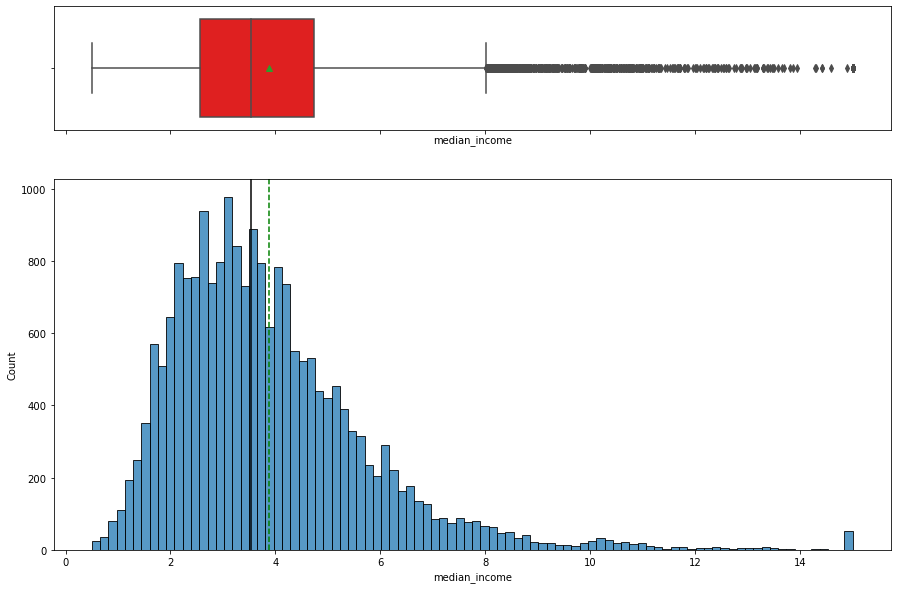

In [9]:
histogram_boxplot(df.median_income)

**Observations**

- The distribution of median income is heavily right-skewed.
- This means that the majority of individuals or households in the dataset have relatively low incomes, while there are a few high-income outliers that significantly pull the mean of the distribution towards the right. 

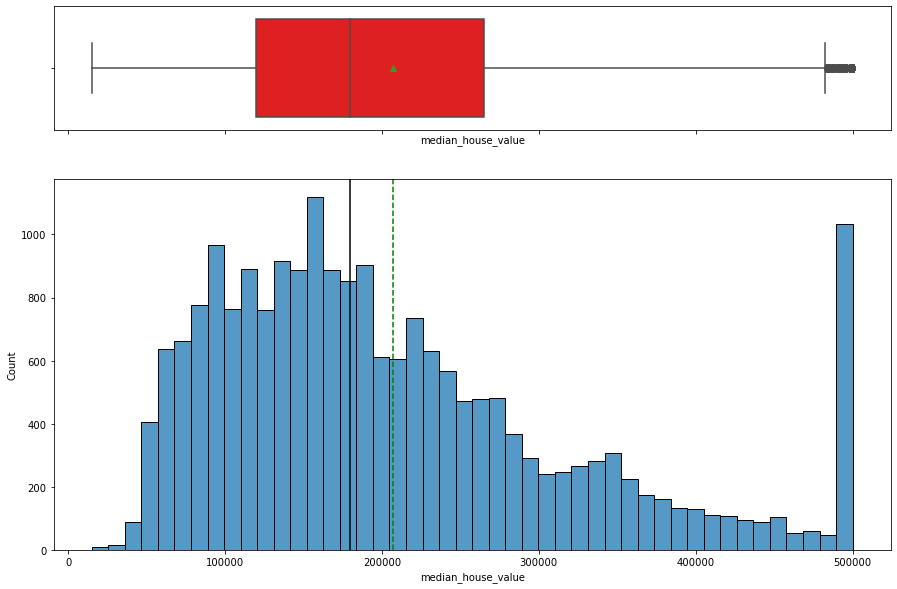

In [10]:
histogram_boxplot(df.median_house_value)

**Observations**

- The distribution of median house value is also right-skewed.
- This means that the majority of the houses in the dataset have relatively lower house values, while there are a few high-valued outliers that significantly pull the mean of the distribution towards the right. 
- We also notice that the distibution is also sort of heavily modal at 500,000 value mark. This may indicates that the **`median house value`** feature may have been capped at that amount showing that there are some houses that are more than 500,000 value. 

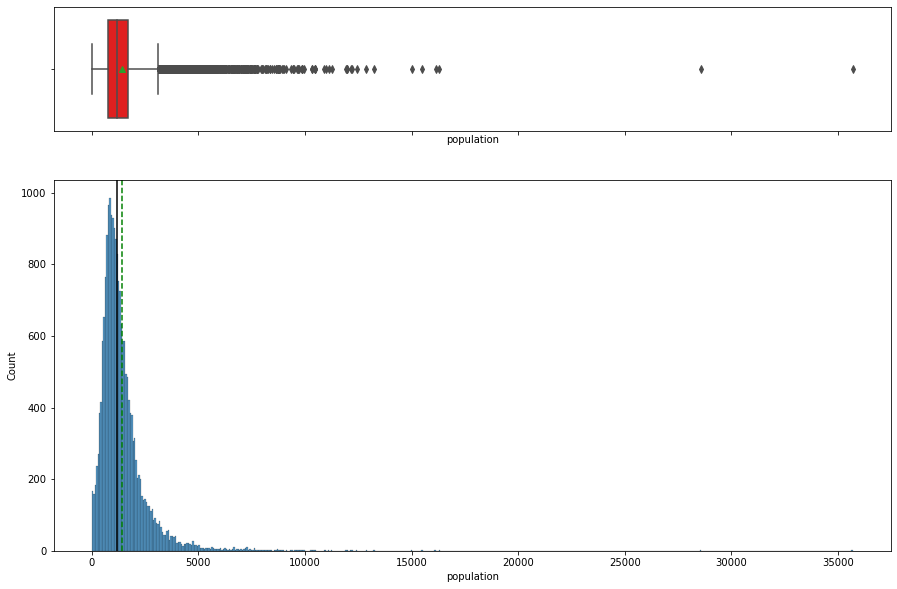

In [11]:
histogram_boxplot(df.population)

**Observations**

- The distribution of population is heavily right-skewed with a lot of outliers in the dataset.
- Most of the blocks have populations in the lower range with a few blocks having very high population figures

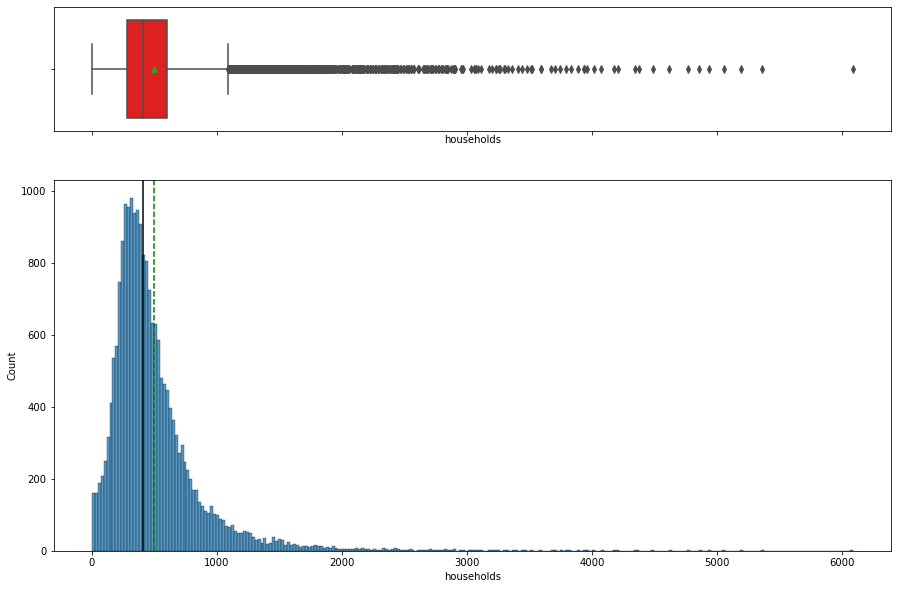

In [12]:
histogram_boxplot(df.households)

**Observations**

- The distribution of households is heavily right-skewed with a lot of outliers in the dataset.
- Most of the blocks have populations in the lower range with a few blocks having high population figures

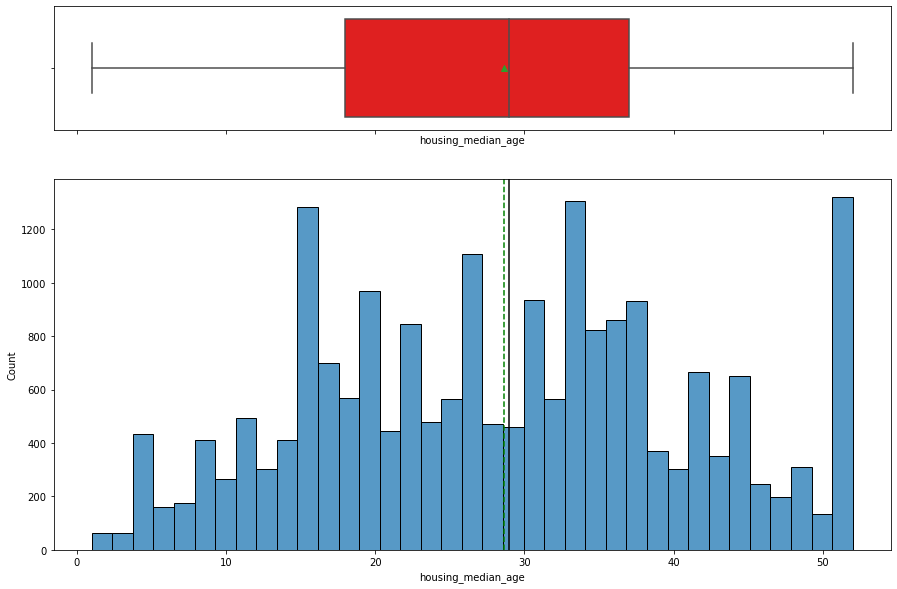

In [13]:
histogram_boxplot(df.housing_median_age)

**Observations**

- The above plot just confirms what we already saw when we performed summary statistics of the numerical features. - The median age of houses for 25% of the districts is below 18 years. The median age of 50% of the houses is 29 years
- 75% of the houses have a median age of 37 years
- The distribution is somewhat symmetrical like a normal distribution. It is multi-modal.

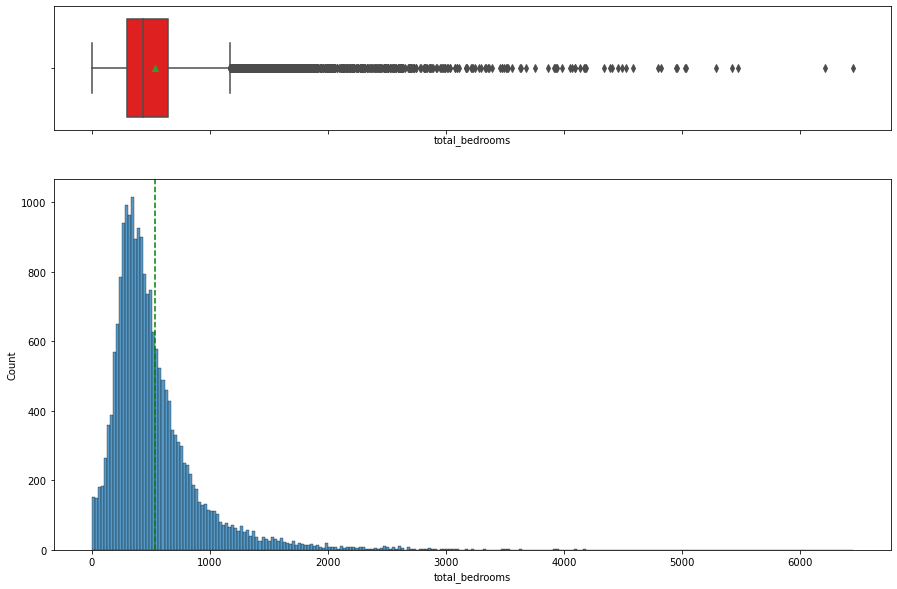

In [14]:
histogram_boxplot(df.total_bedrooms)

**Observations:**

- The distribution is heavily right-skewed with a lot of outliers in the dataset.

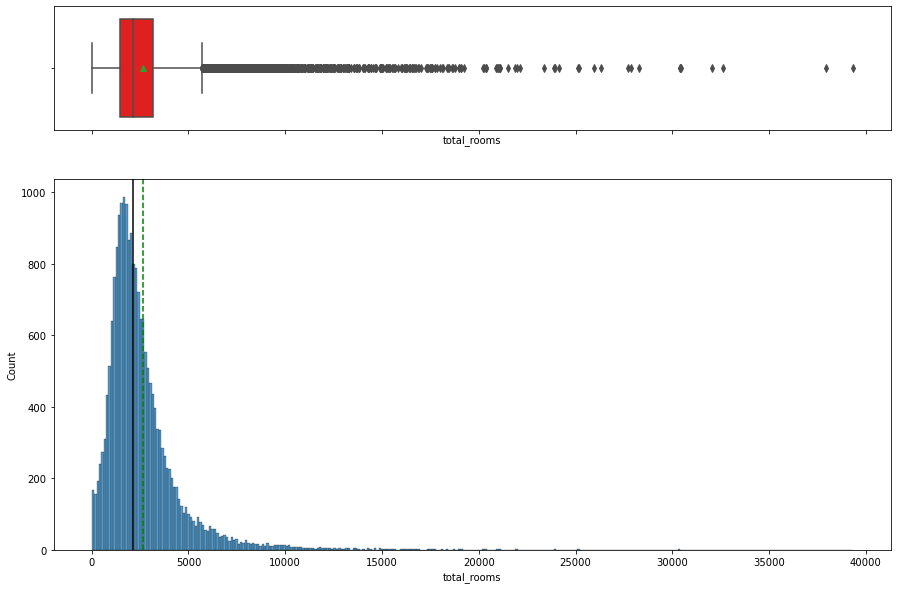

In [15]:
histogram_boxplot(df.total_rooms)

**Observations:**
- The distribution of total_rooms is also heavily right-skewed with a lot of outliers in the dataset.

**2.1.2 The Univariate analysis of the categorical attribute**

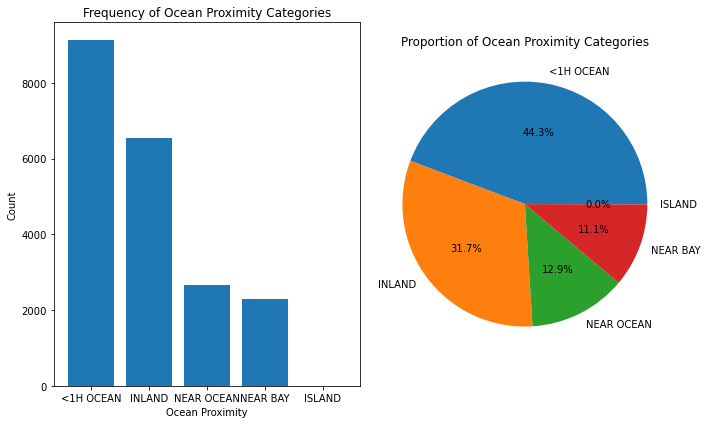

Descriptive Statistics for Ocean Proximity:
count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object


In [16]:
# Calculate the frequency of each 'ocean_proximity' category
category_counts = df['ocean_proximity'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Bar plot of category counts
plt.subplot(1, 2, 1)
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.title('Frequency of Ocean Proximity Categories')

# Pie chart of category proportions
plt.subplot(1, 2, 2)
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Ocean Proximity Categories')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Display descriptive statistics
print("Descriptive Statistics for Ocean Proximity:")
print(df['ocean_proximity'].describe())

**Observations:**
- Out of the 20640 entries in our dataset, **`<1H Ocean`** has the highest number of entries. Over 44% of the blocks in our dataset are in this category 
- This is followed by **`Inland`** (31%), **`Near Ocean`** (12.9%), **`Near Bay`** (11%) and **`Island`** (less than 0.5%, actually just 5 entries belong in this category)


### 2.2 Bivariate Analysis 

Let's look at the relationships between all the variables. 

**2.2.1 Since our dataset contains geographical information, a good place to start is to create a scatterpot of the entire city (using the latitude and longitude features)**

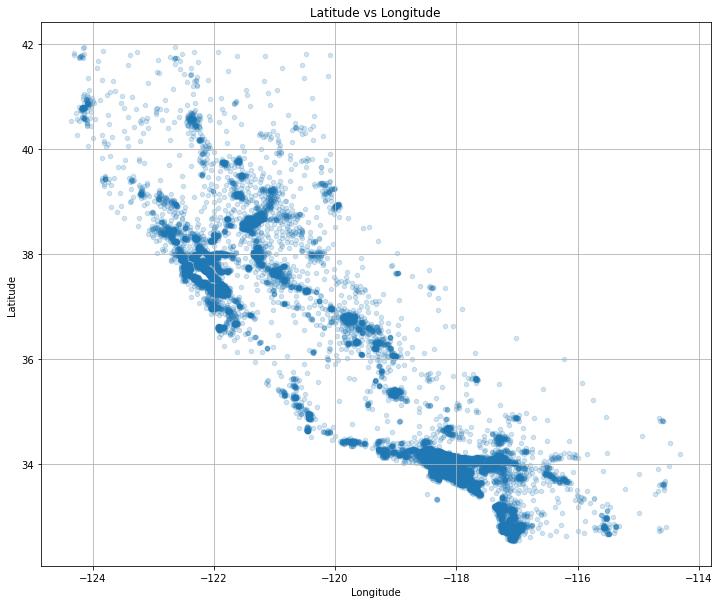

In [17]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Create the scatter plot
df.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2, ax=ax)

# Set plot title and labels
ax.set_title("Latitude vs Longitude")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the plot
plt.show()

**Observations**

- In the plot above we can clearly observe a map with some high density areas. These are the areas on this figure with intense concentration of the blue
- These areas obviously are the densely populated areas. Since we have more blocks situated in the dense areas, that also means that they are more populated

**2.2.2 Next, let's find out if there's a relationship between the housing prices and the population density**

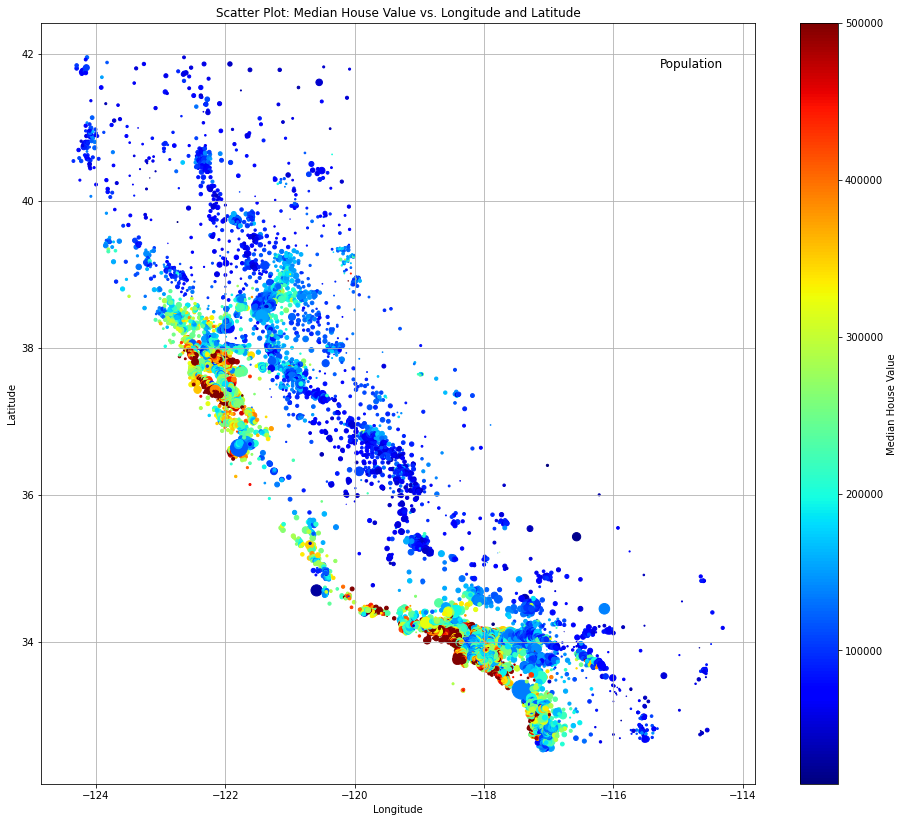

In [18]:
# Set the figure size
plt.figure(figsize=(16, 14))

# Create a scatter plot
plt.scatter(df['longitude'], df['latitude'], s=df['population']/100, c=df['median_house_value'], cmap='jet')

# Set colorbar
plt.colorbar(label='Median House Value')

# Set the labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot: Median House Value vs. Longitude and Latitude')
plt.grid(True)

# Add population label
plt.text(df['longitude'].max(), df['latitude'].max(), 'Population', ha='right', va='top', fontsize=12)

# Display the plot
plt.show()

**Observations**

- Each data point on the image represents a block (or district).
- The radius of each circle represents the block's population. The bigger the circle, the more populated the block.
- The colour represents the median house values. 
- We can observe that generally the median house values is corelated to it's location (ocean proximity) and also to the population density (areas with high population density have higher median house values).
- The house prices in the high-density areas are higher than in the low density areas.
- The closer the house is to the ocean, the higher the price of the house.

**2.2.3 Let's explore the relationship between the house location, the median incomes and the population density**

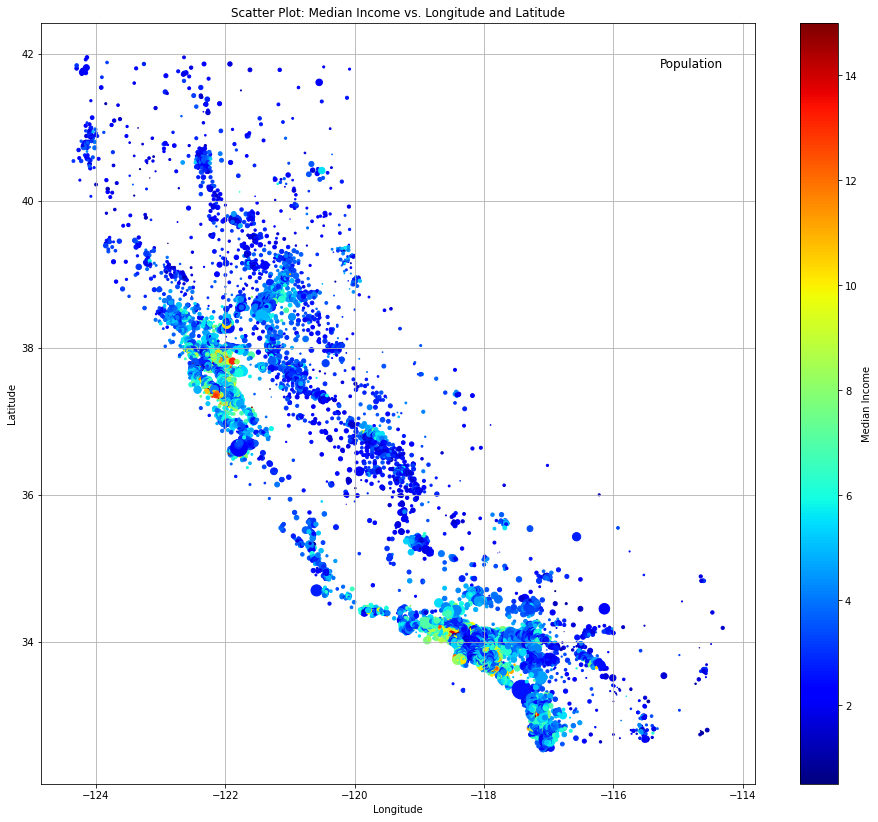

In [19]:
# Set the figure size
plt.figure(figsize=(16, 14))

# Create a scatter plot
plt.scatter(df['longitude'], df['latitude'], s=df['population']/100, c=df['median_income'], cmap='jet')

# Set colorbar
plt.colorbar(label='Median Income')

# Set the labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot: Median Income vs. Longitude and Latitude')
plt.grid(True)

# Add population label
plt.text(df['longitude'].max(), df['latitude'].max(), 'Population', ha='right', va='top', fontsize=12)

# Display the plot
plt.show()

**Observations**

- We can also observe that the areas with high median house values are also where we find high median incomes. 
- This means that there is a relationship between median income and median house values

**2.2.4 Let's look at the age of the houses with regards to their closeness to the ocean/sea**

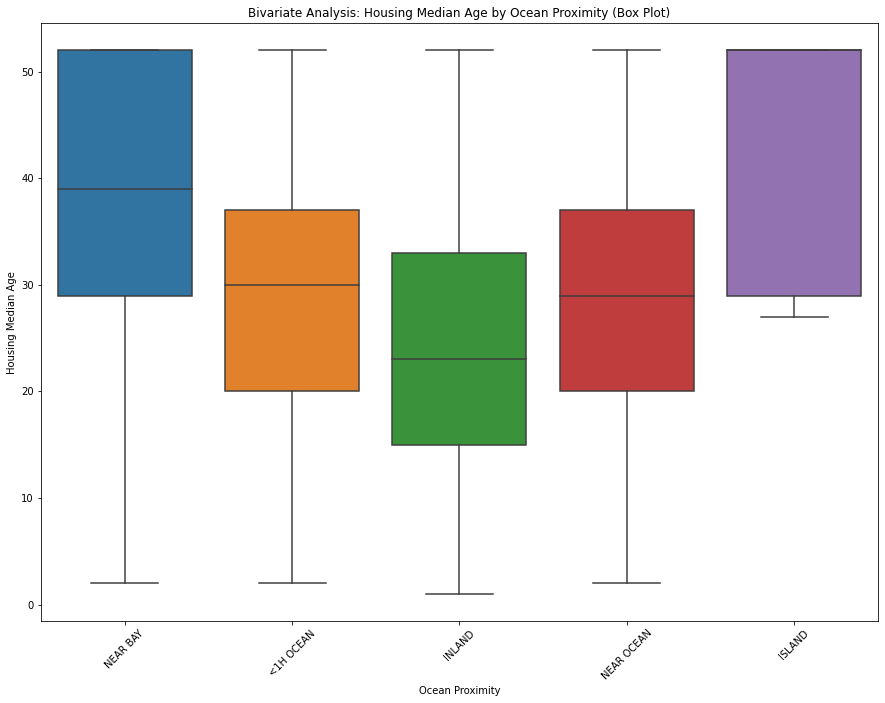

In [20]:
# Set the figure size
plt.figure(figsize=(15, 11))

# Create a box plot
sns.boxplot(x='ocean_proximity', y='housing_median_age', data=df)

# Set the labels and title
plt.xlabel('Ocean Proximity')
plt.ylabel('Housing Median Age')
plt.title('Bivariate Analysis: Housing Median Age by Ocean Proximity (Box Plot)')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Observations**

- We can observe that the blocks located **`Near Bay`** and on the **`Island`** have the oldest houses
- The newest properties are those located **`Inland`**
- The blocks **`<1H Ocean`** and **`Near Ocean`** seem to have house with relatively similar ages but the houses located **`Near Ocean`** are slightly newer.

**2.2.5 Let's check the relationship between the median houses values and ocean proximity**

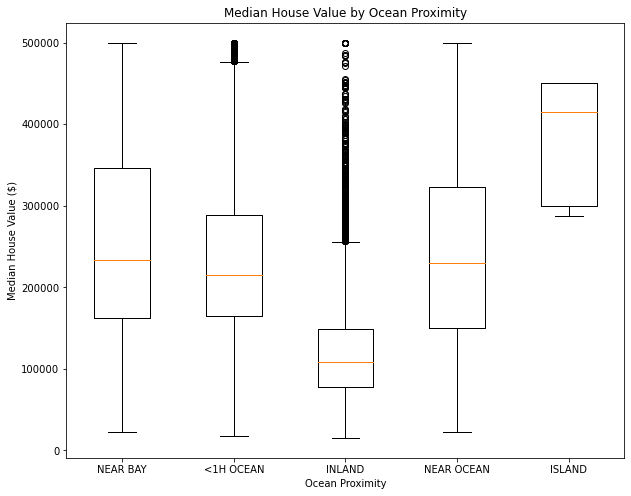

In [21]:
# Create a box plot of median house values by ocean proximity
plt.figure(figsize=(10, 8))
plt.boxplot([df[df['ocean_proximity'] == category]['median_house_value'] for category in df['ocean_proximity'].unique()])
plt.xticks(range(1, len(df['ocean_proximity'].unique()) + 1), df['ocean_proximity'].unique())
plt.title("Median House Value by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value ($)")
plt.show()

**I'll visualize the same information using a scatter plot**

In [22]:
def visualize_ocean_proximity_categories(df):
    """
    Create separate plots for each category of ocean proximity.

    Args:
        df (pandas.DataFrame): DataFrame containing the dataset with 'ocean_proximity' column.
    """

    # List of ocean proximity categories
    categories = ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

    # Iterate over categories and create plots
    for category in categories:
        # Filter the data for the current category
        category_data = df[df['ocean_proximity'] == category]

        # Set the figure size
        plt.figure(figsize=(10, 8))

        # Create a scatter plot
        plt.scatter(category_data['longitude'], category_data['latitude'], c=category_data['median_house_value'], cmap='coolwarm', alpha=0.4)

        # Set the colorbar
        plt.colorbar(label='Median House Value')

        # Set the labels and title
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(f'Scatter Plot for Median House Value - {category}')

        # Display the plot
        plt.show()

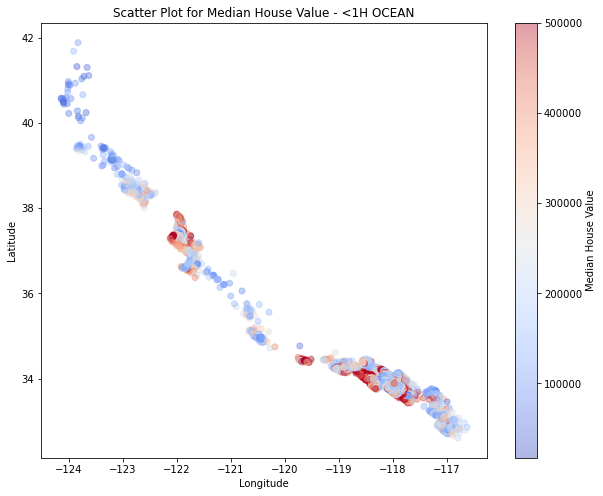

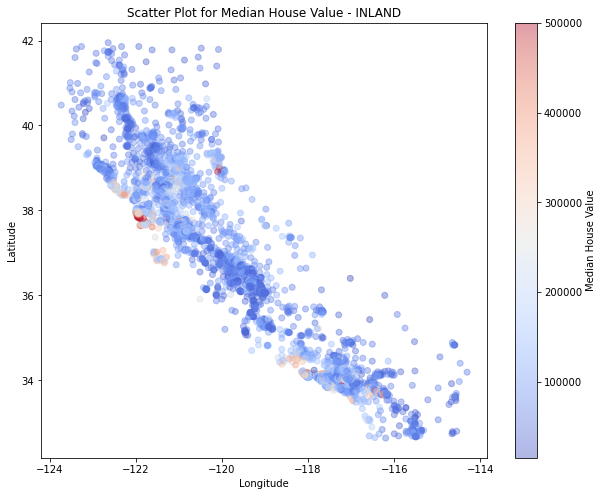

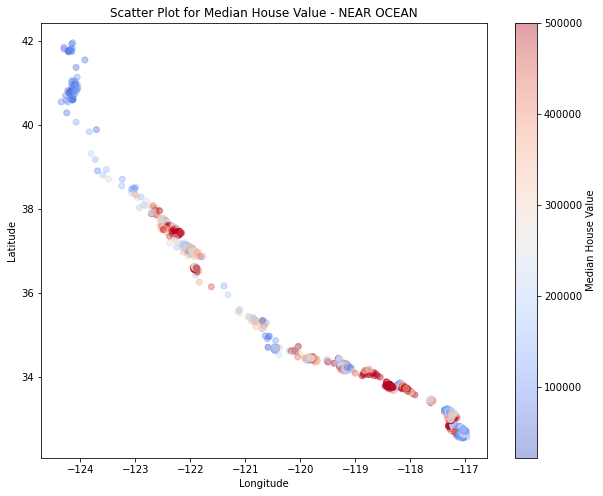

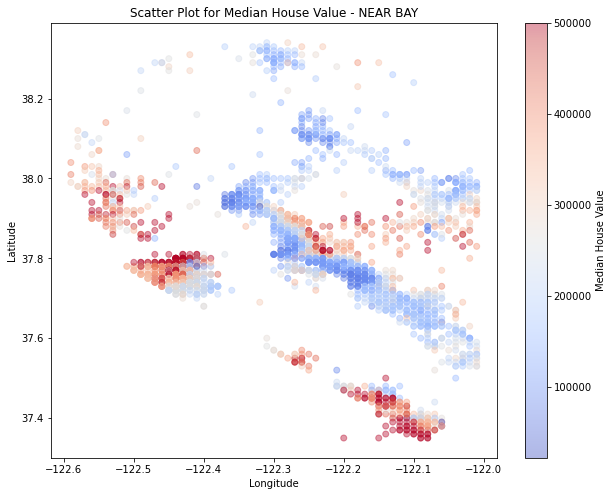

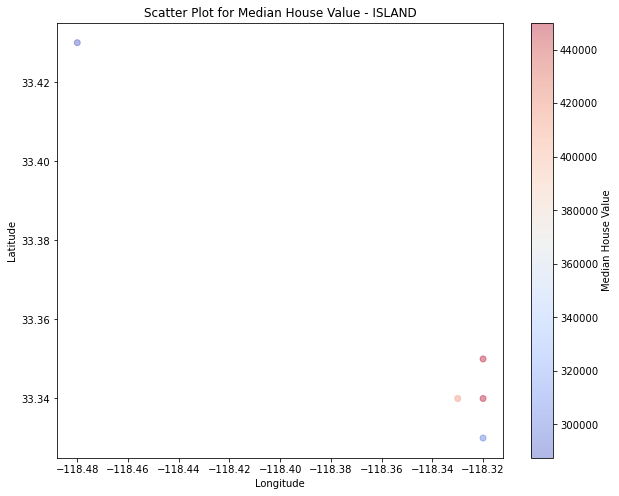

In [23]:
visualize_ocean_proximity_categories(df)

**Observations**

- The houses in the blocks located on the **`ISLAND`** have the highest house values with median values far exceeding that of any other locations (over 400,000 USD).
- Though the houses located Inland have the cheapest values of all the areas as we can see above.
- However, we see a lot of outliers for the blocks **`INLAND`**. We see some increadibly expensive houses when compared with the majority of the houses in the same category. This might be due to some other reasons we might be able to see if we had more information. 
- The houses in the remaining 3 locations **`(NEAR OCEAN, NEAR BAY and <1H OCEAN)`** seem to have similar house price values even though houses **`NEAR BAY`** seem to be older than houses in the other 2 locations.
- We also see some extremely expensive houses located **`<1H OCEAN`**. Again this might be due to reasons we can't see in the dataset.

**2.2.6 Let's check the polulation distribution in the different categories of ocean proximity**

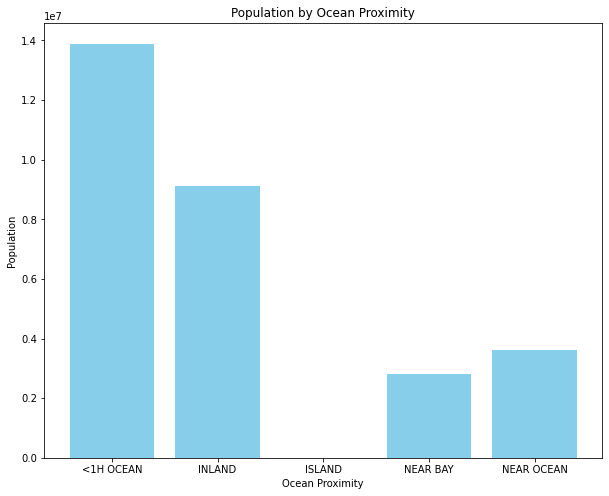

In [24]:
# Group the population by ocean proximity
grouped_data = df.groupby('ocean_proximity')['population'].sum()

# Create a grouped bar plot
plt.figure(figsize=(10, 8))
x = range(len(grouped_data))
plt.bar(x, grouped_data, color='skyblue')
plt.xticks(x, grouped_data.index)
plt.title("Population by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Population")
plt.show()

**Observations**

- We observe that there are more people live less than an hour from the ocean **`(<1H Ocean)`** than in any of the other areas.
- The second most populous area is the **`INLAND`** category.

**2.2.7 Let's explore more closely the correlation between the house value and the median income with respect to ocean proximity**

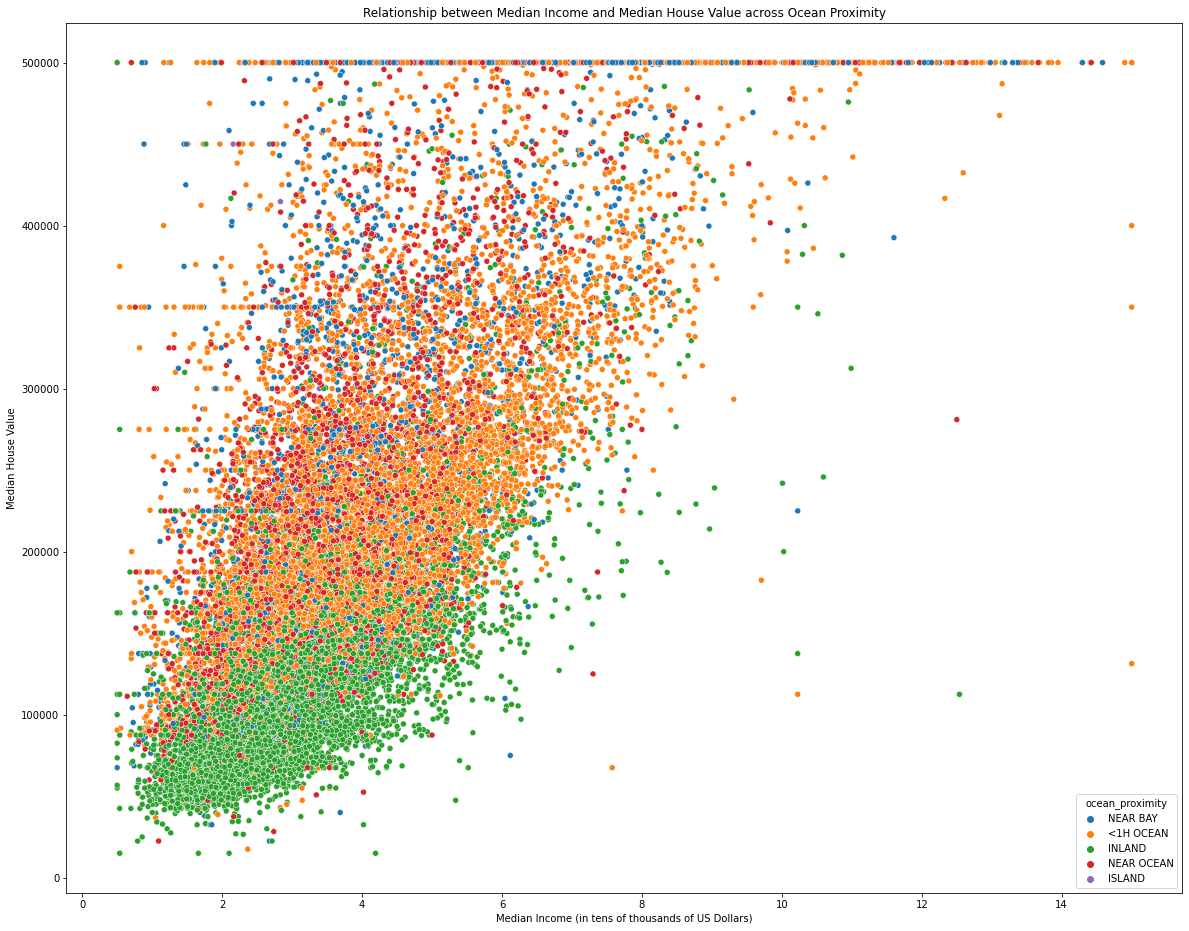

In [25]:
# Set the figure size
plt.figure(figsize=(20, 16))

# Create a scatter plot with different colors for each ocean_proximity category
sns.scatterplot(x='median_income', y='median_house_value', hue='ocean_proximity', data=df)

# Set the labels and title
plt.xlabel('Median Income (in tens of thousands of US Dollars)')
plt.ylabel('Median House Value')
plt.title('Relationship between Median Income and Median House Value across Ocean Proximity')

# Display the plot
plt.show()

**Observations**

- The upward trend indicates a moderately positive correlation between median house values and median incomes for all the ocean_proximity categories in our dataset - this means that generally house values tend to increase as income increases no matter the area.
- The points are not too spread apart. This can make it easier to identify patterns, trends, or relationships in the data.
- We can also say that the median the house values and the median incomes for the blocks located INLAND (highlighted in green) are the lowest in the dataset as we saw earlier.
- We also notice clearly visible lines in the images with dots stacking on a horizontal line. This suggests a feature capping at those different points (500k, 350k, 280k, etc.)

**2.2.8 Let's explore the Median income for the various ocean proximity**

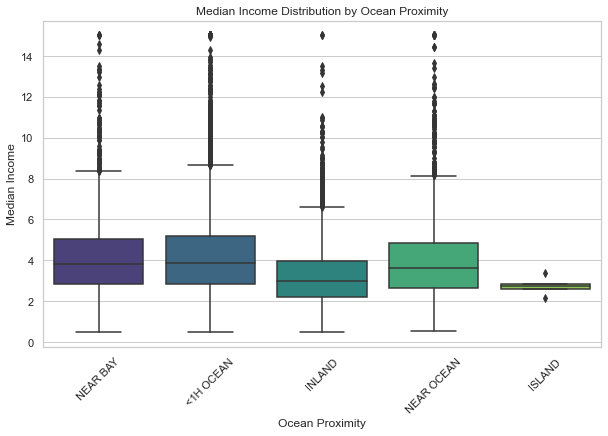

In [26]:
# Set style for better visualization
sns.set(style="whitegrid")

# Create a box plot to visualize 'median_income' for different categories of 'ocean_proximity'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ocean_proximity', y='median_income', palette='viridis')
plt.title('Median Income Distribution by Ocean Proximity')
plt.xticks(rotation=45)
plt.ylabel('Median Income')
plt.xlabel('Ocean Proximity')
plt.show()

**Observations:**

- People living at the INLAND and ISLAND earn the lowest generally speaking. The median income of the of the remaining categories of OceanProximity is relatively similar.
- We saw earlier that the median house value of the houses in the ISLAND is way higher than the other locations but here we see that the median income is not the highest. This may indicate that the value of the houses on the ISLAND might be higher for other reasons. It seems to have nothing to do with median income.
- We also see that for INLAND, the median income and the median house values are the lowest of all the locations which is consistent with the general trend of areas with low median incomes have low median house values. 

**2.2.9 Let's look at the correlation of the nummerical features with the target feature, median house value**

In [27]:
# Let's compute the standard correlation coefficients

correlation_matrix = df.corr()

correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

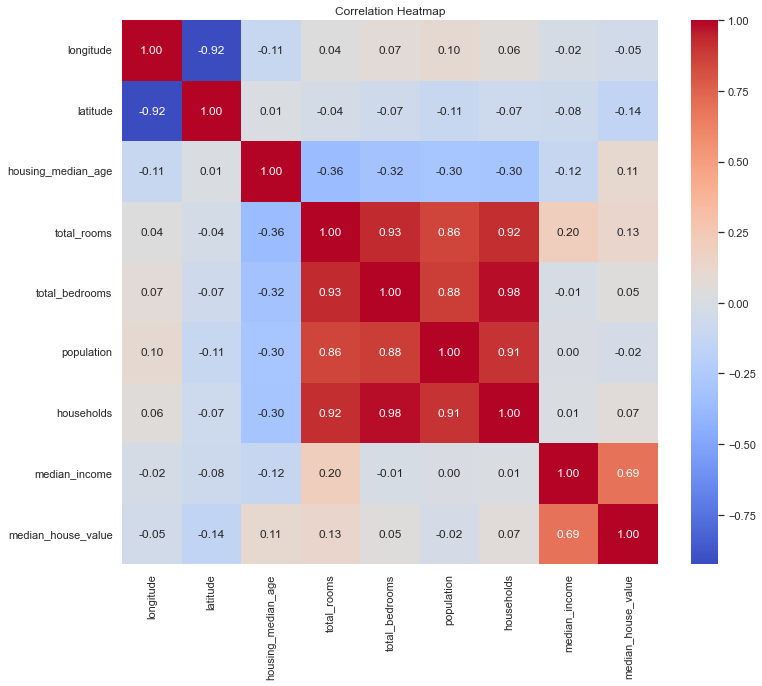

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Correlation Heatmap')
plt.show()

**Observations**

- The **`median income`** is the most correlated feature of all the attributes in the dataset.
- The figures above indicates a moderately positive linear relationship between these two variables - the **`median house value`** and the **`median income`**. 
- This means that, on average, as the **`median_income`** increases, the **`median_house_value`** tends to increase as well, and vice versa. The correlation is positive, indicating that people with higher income values live in more expensive houses.
- We also see that **`total_rooms`** and **`housing_age`** are also slightly corelated with house prices. 
- We also see that **`latitude`** is slightly negatively correlated with the **`median house value`**. This shows that the more you go north, the more expensive the houses 


_________

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

**1. House Age and Value:** The median age of houses varies across blocks, with 25% having houses below 18 years old.
There's a moderate correlation between house age and median house value, suggesting that newer houses tend to have higher values.

**2. Population and Density:** Most blocks have a relatively small population, with an average around 1425 people.
Higher population density areas tend to have higher median house values.
Population and households features are heavily right-skewed with outliers, indicating that some blocks have significantly larger populations and households.

**3. Income and House Value:** Median income has a heavy right-skewed distribution with outliers, indicating that a few areas have high incomes. There's a strong positive correlation between median income and median house value. Higher-income areas tend to have more expensive houses.

**4. Ocean Proximity and House Value:** Houses located on islands have the highest median house values, followed by those near the ocean, near the bay, and then <1 hour from the ocean.
The distribution of house values is right-skewed, and areas near the ocean seem to have more variability in house prices.

**5. Location and House Characteristics:** Houses located inland tend to be newer, while those near the bay are generally older. Areas with high median house values are correlated with high median incomes.
Some areas have houses with significantly higher values compared to the majority in the same category, indicating potential outliers.

**6. Correlations:** Median income shows the strongest positive correlation with median house value among all attributes. Higher income is associated with higher house values. There's a moderate positive correlation between median house value and median house age, indicating that newer houses tend to have higher values. There are also slight correlations between house prices and total rooms, as well as housing age.

**7. Skewed Distributions:** Many features, such as median income, median house value, population, households, total bedrooms, and total rooms, exhibit right-skewed distributions with outliers. We would apply log transformations on the attributes aside the target variable before we feed them into our models.

**8. Income and Density:** The majority of households have relatively low incomes, while a few high-income households significantly affect the mean income value.

**9. Location Factors:** Ocean proximity and population density are significant factors influencing house values. Houses closer to the ocean tend to have higher values, and higher population density areas also have higher values.

**10. Value Capping:** The distribution of median house values is heavily modal around the 500,000 USD mark, suggesting possible capping at that value. Some houses may be valued higher than the recorded median.

**11. Outliers and Variability:** Outliers are observed in various attributes, indicating areas with significantly different characteristics from the majority in their category.

______

## 3.0 Data Preprocessing for Machine Learning 

### 3.1.0 Handling Outliers

Firstly, I'll start by investigating the outliers we noticed in the dataset during the EDA session especially in the following features: `total_rooms`, `total_bedrooms`, `population` and `households`. 

- I would like to find out if these outliers are errors made during data collection or if they are just rare occurrences. This is so I'll decide the best way to approach handling them.

**Let's look at total_rooms firstly**

In [29]:
sorted_df = df.sort_values(by='total_rooms', ascending=False)
sorted_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
12201,-117.20,33.58,2.0,30450.0,5033.0,9419.0,3197.0,4.5936,174300.0,<1H OCEAN


In [30]:
df = df.drop([13139, 10309], axis=0)

In [31]:
sorted_df2 = df.sort_values(by='total_bedrooms', ascending=False)
sorted_df2.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN
8985,-118.44,33.98,21.0,18132.0,5419.0,7431.0,4930.0,5.3359,500001.0,<1H OCEAN
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
12201,-117.20,33.58,2.0,30450.0,5033.0,9419.0,3197.0,4.5936,174300.0,<1H OCEAN
12623,-121.53,38.48,5.0,27870.0,5027.0,11935.0,4855.0,4.8811,212200.0,INLAND


In [32]:
df = df.drop(9880, axis=0)

In [33]:
sorted_df3 = df.sort_values(by='population', ascending=False)
sorted_df3.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15360,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,<1H OCEAN
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
6066,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,339700.0,<1H OCEAN
12215,-117.12,33.52,4.0,30401.0,4957.0,13251.0,4339.0,4.5841,212300.0,<1H OCEAN
9019,-118.78,34.16,9.0,30405.0,4093.0,12873.0,3931.0,8.0137,399200.0,NEAR OCEAN


In [34]:
df = df.drop(15360, axis=0)

In [35]:
sorted_df4 = df.sort_values(by='households', ascending=False)
sorted_df4.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
8985,-118.44,33.98,21.0,18132.0,5419.0,7431.0,4930.0,5.3359,500001.0,<1H OCEAN
12623,-121.53,38.48,5.0,27870.0,5027.0,11935.0,4855.0,4.8811,212200.0,INLAND
12106,-117.34,33.98,10.0,17286.0,4952.0,9851.0,4616.0,1.7579,103400.0,INLAND
9145,-118.46,34.40,12.0,25957.0,4798.0,10475.0,4490.0,4.5420,195300.0,<1H OCEAN


**Observations:**

- Now that we have removed the very extreme values from the dataset, let's visualize the distributions one more time before we proceed:

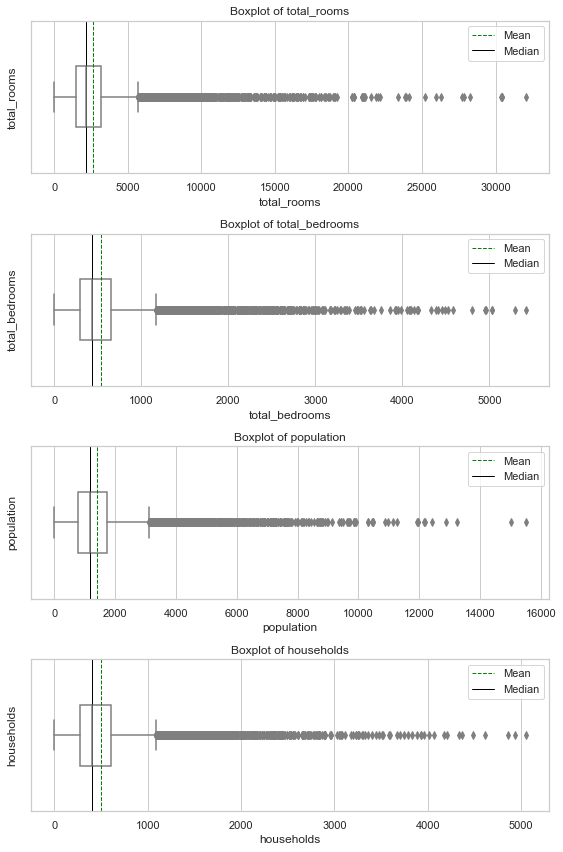

In [36]:
# Features to plot
features = ['total_rooms', 'total_bedrooms', 'population', 'households']

# Create subplots
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 12))

# Loop through each feature and create boxplots
for i, feature in enumerate(features):
    # Boxplot
    sns.boxplot(data=df, x=feature, ax=axes[i], color='lightgray', width=0.4, boxprops={'facecolor': 'none'})
    
    # Mean marker
    mean = df[feature].mean()
    axes[i].axvline(x=mean, color='green', linestyle='dashed', label='Mean', linewidth=1)
    
    # Median marker
    median = df[feature].median()
    axes[i].axvline(x=median, color='black', linestyle='solid', label='Median', linewidth=1)
    
    # Set title and labels
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


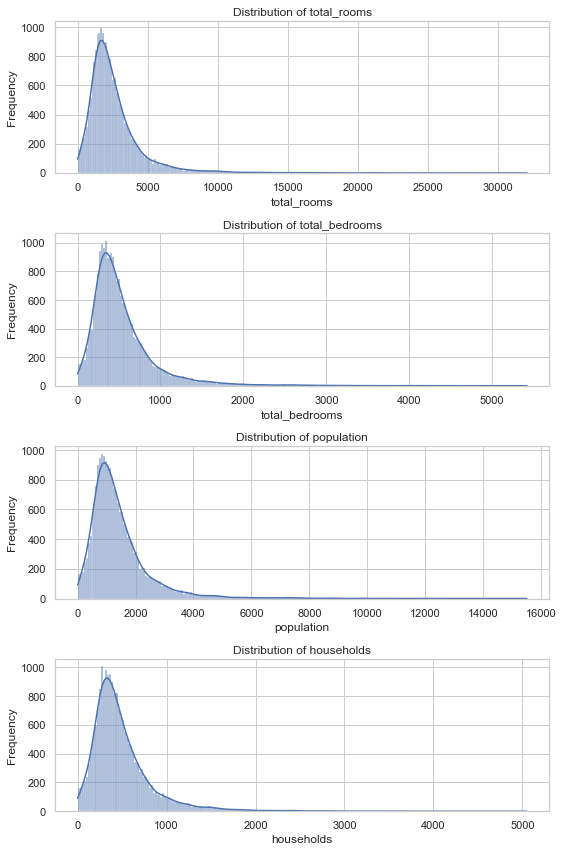

In [37]:
# Create subplots
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 12))

# Loop through each feature and create distribution plots
for i, feature in enumerate(features):
    # Distribution plot
    sns.histplot(data=df, x=feature, ax=axes[i], kde=True)
    
    # Set title and labels
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


**Observations:**

- Though we removed very extreme outliers, we see that their distributions are still heavily right-skewed. So we will use another technique called `Log Transformations` to handle the outliers and make their distributions somewhat normal before using them to build our model  

### 3.2.0 Handling Missing values

Firstly, we will handle missing values in the `"total_bedroom"` column. We fill the missing rows with it's median value.

In [38]:
# Calculate the median of 'total_bedrooms' excluding null values
median_total_bedrooms = df['total_bedrooms'].median(skipna=True)

# Fill the 'total_bedrooms' column with its median value
df['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

In [39]:
# Let's check if there are stillany missing values in the dataset
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### 3.3.0 Feature Engineering

We will try some interesting attribute combinations to see how they might affect our target variable 

In [40]:
# Firstly, let's create a new column called "rooms_per_house" and later we'll see if this will affect the house value 
df["rooms_per_house"] = df["total_rooms"] / df["households"]

In [41]:
# Next we will create a new column called "bedroom_ratio" that tells us the ratio of bedrooms to total rooms in a block
df["bedroom_ratio"] = df["total_bedrooms"] / df["total_rooms"]

In [42]:
# Lastly, we'll check if the number of people in a house will affect the value of the house
df["people_per_house"] = df["population"] / df["households"]

**Let's check and find out how these new attributes are correlated with our target variable**



In [43]:
correlation_matrix2 = df.corr()

correlation_matrix2["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688046
rooms_per_house       0.151927
total_rooms           0.137096
housing_median_age    0.105659
households            0.067257
total_bedrooms        0.050577
people_per_house     -0.023721
population           -0.024534
longitude            -0.046065
latitude             -0.144115
bedroom_ratio        -0.233299
Name: median_house_value, dtype: float64

**Observations:**

- Of the 3 new attributes, `bedroom_ratio` is more correlated to the target variable than `rooms_per_house` and `people_per_house`.
- `bedroom_ratio` is also more correlated to our target variable than `total_bedrooms` and `total_rooms`.
- From the correlation matrix above, we see that houses with lower bedroom/room ratio tend to be more expensive. This means that the fewer the number of bedrooms in the a house the more expensive the house.
- We also see that the number of rooms per house is more correlated to the target variable than the total number of rooms in a block and hence it will contribute more to the model building exercise

### 3.4.0 Feature Transformations

We have to transform the attributes that have a heavily right-skewed distribution into a bell shaped distribution before building our models

* Firstly we will examine the distributions of the `rooms_per_house` and `bedroom_ratio` that we added in feature engineering exercise above since they showed to correlated to the target variable

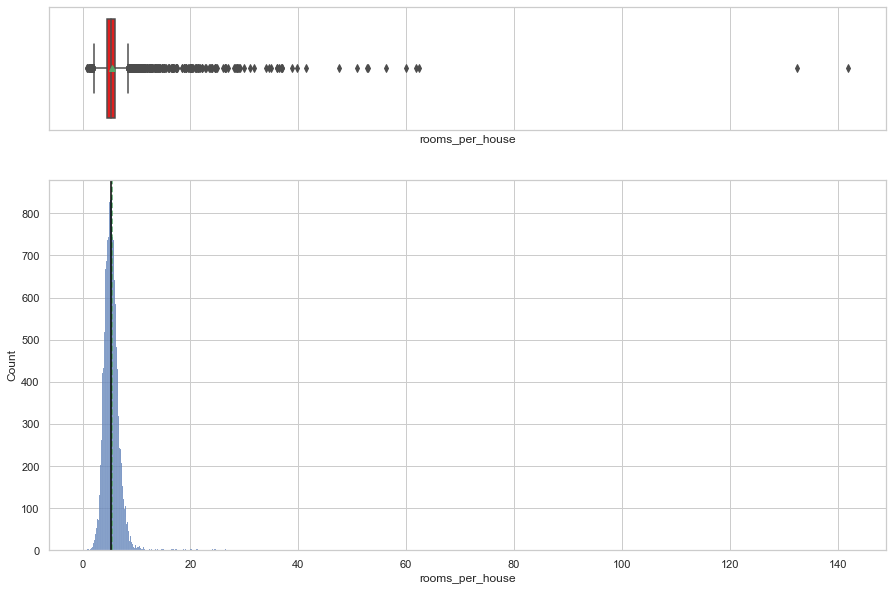

In [44]:
histogram_boxplot(df.rooms_per_house)

In [45]:
sorted_df6 = df.sort_values(by='rooms_per_house', ascending=False)
sorted_df6.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,INLAND,141.909091,0.180653,2.727273
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,132.533333,0.257042,2.400000
12447,-114.49,33.97,17.0,2809.0,635.0,83.0,45.0,1.6154,87500.0,INLAND,62.422222,0.226059,1.844444
1913,-120.06,39.01,19.0,2967.0,528.0,112.0,48.0,4.0714,437500.0,INLAND,61.812500,0.177958,2.333333
11862,-121.25,40.27,25.0,958.0,245.0,28.0,16.0,2.6250,67500.0,INLAND,59.875000,0.255741,1.750000


In [46]:
df = df.drop([1914, 1979], axis=0)

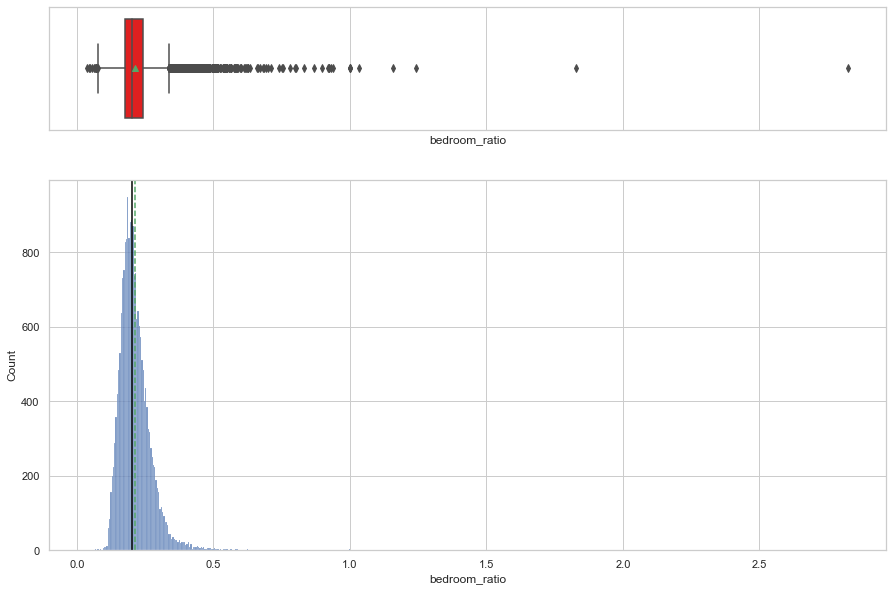

In [47]:
histogram_boxplot(df.bedroom_ratio)

In [48]:
sorted_df5 = df.sort_values(by='bedroom_ratio', ascending=False)
sorted_df5.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedroom_ratio,people_per_house
2826,-119.11,35.42,52.0,154.0,435.0,37.0,16.0,10.0263,200000.0,INLAND,9.625000,2.824675,2.312500
9877,-121.85,36.61,38.0,238.0,435.0,191.0,67.0,1.3897,125000.0,<1H OCEAN,3.552239,1.827731,2.850746
9942,-122.23,38.17,45.0,350.0,435.0,225.0,72.0,1.8942,216700.0,NEAR BAY,4.861111,1.242857,3.125000
13597,-117.28,34.09,44.0,376.0,435.0,273.0,107.0,2.2917,90800.0,INLAND,3.514019,1.156915,2.551402
19391,-120.85,37.78,25.0,421.0,435.0,303.0,106.0,2.2679,71300.0,INLAND,3.971698,1.033254,2.858491


In [49]:
df = df.drop(2826, axis=0)

**Observations:**

- We can clearly see that the outliers at indices 1914, 1979 and 2826 are erroneous entries. So we will remove them from the dataset.

**We get the log transformation of the heavily skewed features now**

In [50]:
def visualize_log_distribution(features, figsize=(12, 12)):
    """
    Visualize the distribution of the logarithm-transformed versions of the input features.

    Parameters:
        features (list): List of 1-d feature arrays to be visualized.
        figsize (tuple): Size of the figure (width, height).

    Returns:
        None
    """
    sns.set(style="whitegrid")
    num_features = len(features)
    
    f, axes = plt.subplots(nrows=4, ncols=2, figsize=figsize)
    
    for i, feature in enumerate(features):
        log_transformed = np.log(feature)
        sns.histplot(data=log_transformed, kde=False, ax=axes[i // 2, i % 2])  # Use data parameter
        axes[i // 2, i % 2].set_title(f'Log-transformed {feature.name}')
        axes[i // 2, i % 2].set_xlabel('Log-transformed Value')
        axes[i // 2, i % 2].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

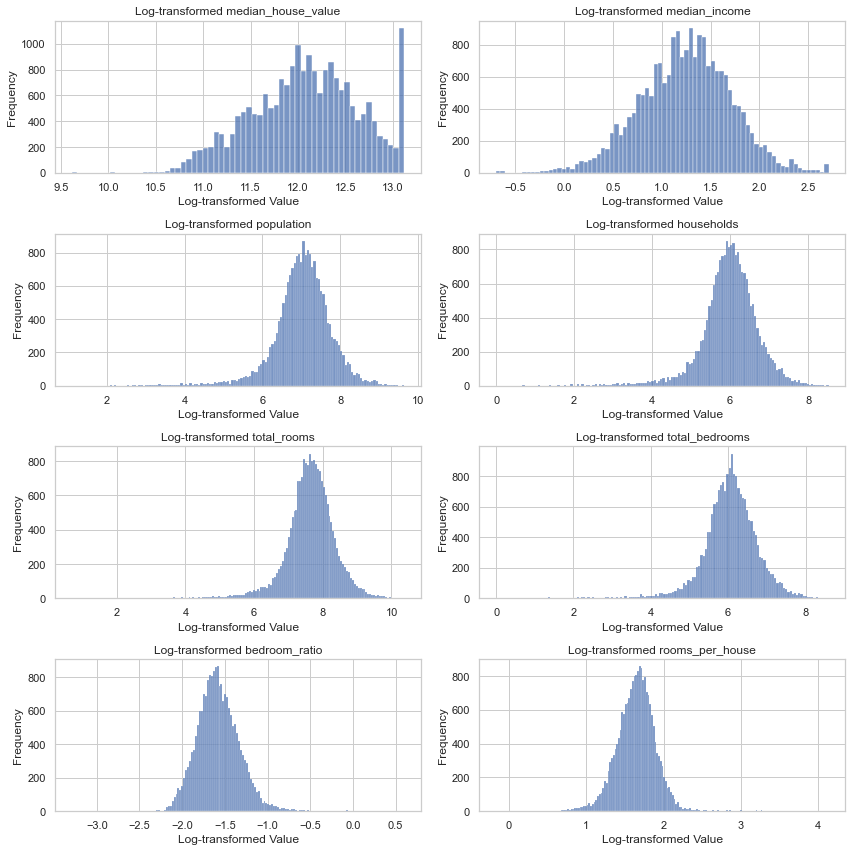

In [51]:
# List of columns to visualize
columns_to_visualize = ['median_house_value', 'median_income', 'population', 'households', 
                        'total_rooms', 'total_bedrooms', 'bedroom_ratio', 'rooms_per_house']

# Call the function to visualize the log-transformed distributions
visualize_log_distribution([df[column] for column in columns_to_visualize])

**Observations:**

- We can see that the distributions of the right-skewed attributes benefits well when we apply log transformation on them as is evidenced in the bell-shaped distribution which also lines up with the assumptions for linear regression models.

- Now we will apply log transformation on the right-skewed attributes:

**Transforming the selected right-skewed features above**

In [52]:
# List of features to perform log transformation on
columns_to_transform = ['median_house_value', 'median_income', 'population', 'households',
                        'total_rooms', 'total_bedrooms', 'bedroom_ratio', 'rooms_per_house']

In [53]:
# Apply log transformation and add the new columns to the DataFrame
for col in columns_to_transform:
    df[col + '_log'] = np.log(df[col])

In [54]:
# Verify the transformed data
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,bedroom_ratio,people_per_house,median_house_value_log,median_income_log,population_log,households_log,total_rooms_log,total_bedrooms_log,bedroom_ratio_log,rooms_per_house_log
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,0.146591,2.555556,13.022764,2.119287,5.774552,4.836282,6.779922,4.859812,-1.920110,1.943640
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,0.155797,2.109842,12.789684,2.116424,7.783641,7.037028,8.867709,7.008505,-1.859204,1.830682
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,...,0.129516,2.802260,12.771671,1.982022,6.206576,5.176150,7.290975,5.247024,-2.043951,2.114825
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,...,0.184458,2.547945,12.740517,1.730434,6.324359,5.389072,7.149917,5.459586,-1.690331,1.760845
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,...,0.172096,2.181467,12.743151,1.347086,6.336826,5.556828,7.394493,5.634790,-1.759704,1.837665


### 3.5.0 Seperating the indepdent variables (X) and the dependent variable (y). 

In [55]:
X = df.drop(['median_house_value','median_house_value_log'], axis=1)
y = df[['median_house_value','median_house_value_log']]

print(X.shape)
print(y.shape)

(20633, 19)
(20633, 2)


### 3.6.0 Encode the categorical variable. 

In [56]:
#Creating Dummy Variabls for the Categorical Columns
#Dummy variable will be used as independent variables and will not impose any ranking

X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedroom_ratio,...,population_log,households_log,total_rooms_log,total_bedrooms_log,bedroom_ratio_log,rooms_per_house_log,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,...,5.774552,4.836282,6.779922,4.859812,-1.920110,1.943640,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,...,7.783641,7.037028,8.867709,7.008505,-1.859204,1.830682,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,...,6.206576,5.176150,7.290975,5.247024,-2.043951,2.114825,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,...,6.324359,5.389072,7.149917,5.459586,-1.690331,1.760845,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,...,6.336826,5.556828,7.394493,5.634790,-1.759704,1.837665,0,0,1,0


In [57]:
X.shape

(20633, 22)

### 3.7.0 Split X and y datasets into training and testing datasets. 

In [58]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56) # keeping random_state =56 ensuring datasplit remains consistent

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16506, 22), (4127, 22), (16506, 2), (4127, 2))

### 3.8.0 Feature Scaling:

- We will perform feature scaling on the numerical features of both training and testing datasets.

**This is because Linear Regression models work better when the features (predictors) are of the same scale.**

In [60]:
# Separating the numerical features from the categorical features before scaling the numerical features
numeric_features = X_train.columns.tolist()

# List of columns to drop
columns_to_drop = ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
                   'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

# Filter the numeric_features list to exclude the columns to drop
numeric_features = [feature for feature in numeric_features if feature not in columns_to_drop]

numeric_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_house',
 'bedroom_ratio',
 'people_per_house',
 'median_income_log',
 'population_log',
 'households_log',
 'total_rooms_log',
 'total_bedrooms_log',
 'bedroom_ratio_log',
 'rooms_per_house_log']

In [61]:
categorical_features_encoded = ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 
                        'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

categorical_features_encoded

['ocean_proximity_<1H OCEAN',
 'ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN']

__________
### Feature scaling of the numerical features of the training set

**Step1: Separate the numerical and categorical features of the training set**

- This is because we do not want to scale the encoded categorical feature along with the numerical features.

In [62]:
# Separate numerical features from the training data
X_train_num = X_train[numeric_features]

X_train_num.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedroom_ratio,people_per_house,median_income_log,population_log,households_log,total_rooms_log,total_bedrooms_log,bedroom_ratio_log,rooms_per_house_log
20025,-119.05,36.07,21.0,2472.0,523.0,1238.0,504.0,1.7756,4.904762,0.211570,2.456349,0.574138,7.121252,6.222576,7.812783,6.259581,-1.553201,1.590207
171,-122.25,37.79,52.0,1339.0,391.0,1086.0,363.0,2.1810,3.688705,0.292009,2.991736,0.779783,6.990257,5.894403,7.199678,5.968708,-1.230971,1.305276
18153,-122.05,37.36,34.0,2400.0,419.0,1017.0,384.0,4.1369,6.250000,0.174583,2.648438,1.419947,6.924612,5.950643,7.783224,6.037871,-1.745353,1.832581


In [64]:
# Drop 'ocean_proximity_<1H OCEAN' from the list
categorical_features_encoded.remove('ocean_proximity_<1H OCEAN')

In [65]:
# Separate encoded categorical features from the training data
X_train_cat = X_train[categorical_features_encoded]

X_train_cat.head(3)

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20025,1,0,0,0
171,0,0,1,0
18153,0,0,0,0


**Step2: Instatiate a scaler and train the scaler on the training set**

In [66]:
# Create a StandardScaler object
t_scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = t_scaler.fit_transform(X_train_num)

# Convert the scaled array back to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_num.columns)


In [68]:
X_train_scaled_df.shape, X_train_cat.shape

((16506, 18), (16506, 4))

In [69]:
X_train_scaled_df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedroom_ratio,people_per_house,median_income_log,population_log,households_log,total_rooms_log,total_bedrooms_log,bedroom_ratio_log,rooms_per_house_log
0,0.254089,0.211219,-0.606478,-0.074933,-0.029594,-0.169260,0.016171,-1.103658,-0.248319,-0.024900,-0.235780,-1.430012,0.132591,0.332345,0.244587,0.288407,0.105206,-0.217347
1,-1.344263,1.018264,1.855335,-0.607410,-0.350176,-0.311097,-0.360893,-0.891513,-0.823395,1.264538,0.015334,-0.993465,-0.045548,-0.117952,-0.575848,-0.112278,1.380198,-1.259344
2,-1.244366,0.816503,0.425895,-0.108771,-0.282174,-0.375484,-0.304735,0.132003,0.387848,-0.617787,-0.145684,0.365485,-0.134816,-0.040784,0.205032,-0.017004,-0.655095,0.669022


**Step3: Get back our training set by combining the scaled numerical features and the encoded categorical features**

In [70]:
# Reset the index of X_train_cat_encoded to match the index of X_train_scaled_df
X_train_cat.reset_index(drop=True, inplace=True)

# Concatenate the two dataframes horizontally
X1_train = pd.concat([X_train_scaled_df, X_train_cat], axis=1)

X1_train.shape

(16506, 22)

In [71]:
X1_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedroom_ratio,...,population_log,households_log,total_rooms_log,total_bedrooms_log,bedroom_ratio_log,rooms_per_house_log,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.254089,0.211219,-0.606478,-0.074933,-0.029594,-0.169260,0.016171,-1.103658,-0.248319,-0.024900,...,0.132591,0.332345,0.244587,0.288407,0.105206,-0.217347,1,0,0,0
1,-1.344263,1.018264,1.855335,-0.607410,-0.350176,-0.311097,-0.360893,-0.891513,-0.823395,1.264538,...,-0.045548,-0.117952,-0.575848,-0.112278,1.380198,-1.259344,0,0,1,0
2,-1.244366,0.816503,0.425895,-0.108771,-0.282174,-0.375484,-0.304735,0.132003,0.387848,-0.617787,...,-0.134816,-0.040784,0.205032,-0.017004,-0.655095,0.669022,0,0,0,0


__________

### Feature scaling of the numerical features of the TEST set following the same steps as above:

**Step1: Separate the numerical and categorical features of the test set**

In [72]:
# Separate numerical features from the test set
X_test_num = X_test[numeric_features]

X_test_num.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedroom_ratio,people_per_house,median_income_log,population_log,households_log,total_rooms_log,total_bedrooms_log,bedroom_ratio_log,rooms_per_house_log
16269,-121.25,37.95,46.0,2001.0,428.0,1384.0,401.0,1.9402,4.990025,0.213893,3.451372,0.662791,7.232733,5.993961,7.601402,6.059123,-1.542279,1.607441
6644,-118.15,34.16,20.0,2410.0,632.0,2135.0,578.0,1.6887,4.169550,0.262241,3.693772,0.523959,7.666222,6.359574,7.787382,6.448889,-1.338493,1.427808
18745,-122.31,40.55,11.0,13714.0,2302.0,6511.0,2267.0,3.5522,6.049404,0.167858,2.872078,1.267567,8.781248,7.726213,9.526172,7.741534,-1.784639,1.799960


In [73]:
# Separate encoded categorical features from the test data
X_test_cat = X_test[categorical_features_encoded]

X_test_cat.head(3)

,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
16269,1,0,0,0
6644,0,0,0,0
18745,1,0,0,0


**Step2: Use the scaler we trained on the training set to transform the test set**

In [74]:
# Transform the test set with the trained scaler
X_test_scaled = t_scaler.transform(X_test_num)

# Convert the scaled array back to a DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_num.columns)

In [75]:
X_test_scaled_df.shape

(4127, 18)

**Step3: Get back our testing set by combining the scaled numerical features and the encoded categorical features**

In [76]:
# Reset the index of X_train_cat_encoded to match the index of X_train_scaled_df
X_test_cat.reset_index(drop=True, inplace=True)

# Concatenate the two dataframes horizontally
X1_test = pd.concat([X_test_scaled_df, X_test_cat], axis=1)

X1_test.shape

(4127, 22)

In [77]:
X1_test.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedroom_ratio,...,population_log,households_log,total_rooms_log,total_bedrooms_log,bedroom_ratio_log,rooms_per_house_log,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-0.844778,1.093338,1.378855,-0.296289,-0.260316,-0.033021,-0.259273,-1.017523,-0.207998,0.012345,...,0.284192,0.018655,-0.038275,0.012271,0.148422,-0.154320,1,0,0,0
1,0.703625,-0.684975,-0.685891,-0.104071,0.235129,0.667767,0.214063,-1.149132,-0.596002,0.787354,...,0.873686,0.520323,0.210596,0.549183,0.954759,-0.811240,0,0,0,0
2,-1.374232,2.313289,-1.400611,5.208485,4.290975,4.751187,4.730811,-0.173969,0.292986,-0.725599,...,2.389992,2.395530,2.537385,2.329828,-0.810540,0.549724,1,0,0,0


__________

## 4.0 Building Machine Learning Models

**Let's take a look at our training and test datasets before we proceed fully into building our linear regression models >>>**

In [78]:
 X1_train.shape, X1_test.shape,  y_train.shape, y_test.shape

((16506, 22), (4127, 22), (16506, 2), (4127, 2))

**Observations:**
- We have a training set with 16512 samples and 23 features in X_train, and each sample in X_train corresponds to a label with 2 dimensions in y_train.
- The test set has 4128 samples and 23 features in the X_test, and each sample in the X_test also corresponds to a label with 2 dimensions in y_test.
- We are all set to start the model building part of this project.


### Let's select the features we would use for training and test in this exercise

- Remember that most of the features in our training and test datasets have both the actual and the log transformed values of those features, we will drop the actual values and work with the log values

In [79]:
# Dropping the features we don't need from our training set
X2_train = X1_train.drop(['people_per_house','total_rooms', 'total_bedrooms', 'population', 'households', 
                          'median_income','rooms_per_house', 'bedroom_ratio', 'people_per_house', ], axis=1)

In [80]:
# Dropping the features we don't need from our test set
X2_test = X1_test.drop(['people_per_house','total_rooms', 'total_bedrooms', 'population', 'households', 
                          'median_income','rooms_per_house', 'bedroom_ratio', 'people_per_house', ], axis=1)

In [81]:
X2_train.shape, X2_test.shape 

((16506, 14), (4127, 14))

**Next we'll reset the index of y_train and y_test to match with the X_train3 and X_test3**

In [82]:
y_train.reset_index(drop=True, inplace=True)

y_train.head(3)

,median_house_value,median_house_value_log
0,62900.0,11.049301
1,138800.0,11.840789
2,316900.0,12.666342


In [83]:
y_test.reset_index(drop=True, inplace=True)

y_test.head(3)

,median_house_value,median_house_value_log
0,62200.0,11.038110
1,148600.0,11.909013
2,100100.0,11.513925


### Define the Model Performance Evaluation Metrics

In [81]:
#def eval_r2_rmse(model, X_train, X_test, y_train, y_test):
    """
    Calculate R-squared (coefficient of determination) score and RMSE.

    Parameters:
        y_true (array-like): Ground truth target values (actual values).
        y_pred (array-like): Predicted target values (model predictions).

    Returns:
        pd.DataFrame: A DataFrame containing the R-squared score and RMSE value.
    """
    pred_train = np.exp(model.predict(X_train))
    
    pred_test = np.exp(model.predict(X_test))
    
    # Calculate the R-squared (coefficient of determination) score
    r2_train = r2_score(y_train, pred_train)
    
    r2_test = r2_score(y_test, pred_test)

    # Calculate the Root Mean Squared Error (RMSE)
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

    
    result = {
        "Train R2": r2_train,
        "Test R2": r2_test,
        "Train RMSE": rmse_train,
        "Test RMSE": rmse_test
    }

    return pd.DataFrame(result, index=[0])

In [84]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = np.exp(model.predict(predictors))                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### Model 1 - Linear Regression

In [85]:
# Adding the intercept term
X2_train = sm.add_constant(X2_train)


# Add constant to test data
X2_test = sm.add_constant(X2_test)

# Calling the OLS algorithm on the train features and the target variable
ols_model_1 = sm.OLS(y_train['median_house_value_log'], X2_train)

# Fitting the Model
ols_res_1 = ols_model_1.fit()

ols_res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     median_house_value_log   R-squared:                       0.687
Model:                                OLS   Adj. R-squared:                  0.687
Method:                     Least Squares   F-statistic:                     3022.
Date:                    Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                            19:28:47   Log-Likelihood:                -4473.1
No. Observations:                   16506   AIC:                             8972.
Df Residuals:                       16493   BIC:                             9072.
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         12.1861      0.004   2817.134      0.000      12.178      12.195
longitude                     -0.3260      0.011    -30.267      0.000      -0.347      -0.305
latitude                      -0.3469      0.011    -30.567      0.000      -0.369      -0.325
housing_median_age             0.0312      0.003     11.079      0.000       0.026       0.037
median_income_log              0.3372      0.004     82.541      0.000       0.329       0.345
population_log                -0.3109      0.007    -41.859      0.000      -0.325      -0.296
households_log                 0.1147      0.003     34.419      0.000       0.108       0.121
total_rooms_log                0.0988      0.002     40.657      0.000       0.094       0.104
total_bedrooms_log             0.1110      0.002     46.903      0.000       0.106       0.116
bedroom_ratio_log              0.0266      0.004      5.971      0.000       0.018       0.035
rooms_per_house_log           -0.0357      0.004     -8.557      0.000      -0.044      -0.028
ocean_proximity_INLAND        -0.2785      0.009    -30.690      0.000      -0.296      -0.261
ocean_proximity_ISLAND         0.4676      0.142      3.288      0.001       0.189       0.746
ocean_proximity_NEAR BAY      -0.0431      0.010     -4.373      0.000      -0.062      -0.024
ocean_proximity_NEAR OCEAN    -0.0457      0.008     -5.596      0.000      -0.062      -0.030
==============================================================================
Omnibus:                     1738.014   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10085.097
Skew:                           0.339   Prob(JB):                         0.00
Kurtosis:                       6.769   Cond. No.                     5.05e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.55e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Observations:**

- We can see that the **R-squared** for the model is **0.692**. 
- It seems like all the variables are statistically significant to predict the outcome variable as indicated by the **p-value** against all the independent variables.

**Interpreting the Regression Results:**

1. **Adj. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adjusted R-squared is **0.692**.

2. **coeff**: It represents the change in the output Y due to a change of one unit in the independent variable (everything else held constant).

3. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the more accurate the coefficients are.
    
4. **P >|t|**: It is the p-value.
   
   * Pr(>|t|) : For each independent feature, there is a null hypothesis and alternate hypothesis.

    Ho : Independent feature is not significant. 
   
    Ha : Independent feature is significant. 
    
   * The p-value of less than 0.05 is considered to be statistically significant with a confidence level of 95%. According to the summary above, the p-values of our independent variables are statistically significant 

   
5. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

### Model Performance Evaluation

**Model Performance Evaluation on Training set** 

In [86]:
ols_train_eval= model_performance_regression(ols_res_1, X2_train, y_train["median_house_value"])


ols_train_eval

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,66486.594902,46091.946632,0.668054,0.667752,24.45657


**Model Performance Evaluation on Testing dataset** 

In [87]:
ols_test_eval= model_performance_regression(ols_res_1, X2_test, y_test["median_house_value"])


ols_test_eval

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,66261.682839,46229.377606,0.669839,0.668634,24.665164


### Checking for Multicollinearity

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. **If the correlation between independent variables is high, it can cause problems when we fit the model and interpret the results.** When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

**VIF scores quantify multicollinearity between predictor variables in a linear regression model. Higher VIF scores indicate stronger multicollinearity.**

* A VIF score of 1 means there is no multicollinearity between a predictor and other predictors.

* VIF scores greater than 5 or close to 10 are often considered indicative of multicollinearity that might need attention.

* Variables with VIF scores above 10 or close to or above infinity (inf) indicate extremely high multicollinearity, which can lead to numerical instability in your regression model.

In [88]:
vif_series = pd.Series(
    [variance_inflation_factor(X2_train.values, i) for i in range(X2_train.shape[1])],
    index = X2_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                          3.065483
longitude                     19.005777
latitude                      21.105937
housing_median_age             1.301870
median_income_log              2.734124
population_log                 9.036135
households_log                      inf
total_rooms_log                     inf
total_bedrooms_log                  inf
bedroom_ratio_log                   inf
rooms_per_house_log                 inf
ocean_proximity_INLAND         2.915371
ocean_proximity_ISLAND         1.003724
ocean_proximity_NEAR BAY       1.571748
ocean_proximity_NEAR OCEAN     1.221951
dtype: float64



**Observations:**

- It's notable that several variables, such as "households_log," "total_bedrooms_log," "total_rooms_log," "rooms_per_house_log," "bedroom_ratio_log," and the encoded categorical features, all have infinite (inf) VIF scores. This suggests that these variables are perfectly linearly dependent on each other or with other variables in the model.

- The "longitude" and "latitude" variables also have relatively high VIF scores, indicating some degree of multicollinearity.

- On the other hand, "housing_median_age" and "median_income_log" have VIF scores below 5, suggesting relatively lower multicollinearity.

- Given the extremely high VIF scores for certain variables, it's important to investigate and address the multicollinearity issue in your regression model. This can involve examining relationships between variables, potentially removing highly correlated variables, or using regularization techniques like Ridge or Lasso regression to mitigate multicollinearity's impact on the model.

In [89]:
X2_train_new = X2_train.drop(["total_rooms_log", "total_bedrooms_log"], axis = 1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X2_train_new.values, i) for i in range(X2_train_new.shape[1])],
    index = X2_train_new.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series2))

VIF Scores: 

const                          3.065483
longitude                     19.005777
latitude                      21.105937
housing_median_age             1.301870
median_income_log              2.734124
population_log                 9.036135
households_log                 8.934435
bedroom_ratio_log              3.658822
rooms_per_house_log            3.006342
ocean_proximity_INLAND         2.915371
ocean_proximity_ISLAND         1.003724
ocean_proximity_NEAR BAY       1.571748
ocean_proximity_NEAR OCEAN     1.221951
dtype: float64



**Observations:**

- We have made progress in reducing multicollinearity, as the VIF scores for most of the features have decreased. 
- Although the encoded categorical features, still show infinite (or very high) VIF scores, but this can be expected due to the nature of one-hot encoding.

- **`Significant Reduction:`** The VIF scores for housing_median_age, median_income_log, population_log, total_bedrooms_log, and bedroom_ratio_log have significantly decreased. This suggests that the multicollinearity between these features has been successfully reduced by dropping other features.

- As I mentioned earlier, the high VIF score in the encoded categorical features is expected due to the one-hot encoding process. When you one-hot encode a categorical feature, you create binary features that are perfectly correlated with each other, leading to high VIF scores.

- In summary, it seems we have successfully reduced multicollinearity among the continuous and derived features and we will proceed with our analysis without concern for the VIF scores of the encoded categorical features.

In [92]:
X2_train_new2 = X2_train_new.drop(["households_log"], axis = 1)

vif_series3 = pd.Series(
    [variance_inflation_factor(X2_train_new2.values, i) for i in range(X2_train_new2.shape[1])],
    index = X2_train_new2.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series3))

VIF Scores: 

const                          3.057883
longitude                     18.952154
latitude                      20.967953
housing_median_age             1.296936
median_income_log              2.671657
population_log                 1.150404
bedroom_ratio_log              3.582109
rooms_per_house_log            3.005795
ocean_proximity_INLAND         2.914214
ocean_proximity_ISLAND         1.003531
ocean_proximity_NEAR BAY       1.550830
ocean_proximity_NEAR OCEAN     1.198409
dtype: float64



In [93]:
X2_train_new3 = X2_train_new2.drop(["longitude", "latitude"], axis = 1)

vif_series4 = pd.Series(
    [variance_inflation_factor(X2_train_new3.values, i) for i in range(X2_train_new3.shape[1])],
    index = X2_train_new3.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series4))

VIF Scores: 

const                         2.476137
housing_median_age            1.284593
median_income_log             2.569645
population_log                1.140646
bedroom_ratio_log             3.546958
rooms_per_house_log           2.845675
ocean_proximity_INLAND        1.611698
ocean_proximity_ISLAND        1.002288
ocean_proximity_NEAR BAY      1.168453
ocean_proximity_NEAR OCEAN    1.132076
dtype: float64



**Let's build the model again now that we have reduced multicollinearity to a reasonable level**

In [94]:
ols_model_2 = sm.OLS(y_train['median_house_value_log'], X2_train_new3)

ols_res_2 = ols_model_2.fit()

ols_res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     median_house_value_log   R-squared:                       0.636
Model:                                OLS   Adj. R-squared:                  0.636
Method:                     Least Squares   F-statistic:                     3207.
Date:                    Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                            22:21:03   Log-Likelihood:                -5720.3
No. Observations:                   16506   AIC:                         1.146e+04
Df Residuals:                       16496   BIC:                         1.154e+04
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         12.2134      0.004   2913.173      0.000      12.205      12.222
housing_median_age             0.0313      0.003     10.362      0.000       0.025       0.037
median_income_log              0.3848      0.004     90.088      0.000       0.376       0.393
population_log                -0.0048      0.003     -1.683      0.092      -0.010       0.001
bedroom_ratio_log              0.0847      0.005     16.877      0.000       0.075       0.095
rooms_per_house_log            0.0173      0.004      3.851      0.000       0.008       0.026
ocean_proximity_INLAND        -0.4401      0.007    -60.486      0.000      -0.454      -0.426
ocean_proximity_ISLAND         0.6846      0.153      4.466      0.000       0.384       0.985
ocean_proximity_NEAR BAY       0.0517      0.009      5.638      0.000       0.034       0.070
ocean_proximity_NEAR OCEAN     0.0566      0.008      6.686      0.000       0.040       0.073
==============================================================================
Omnibus:                     1258.656   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4180.938
Skew:                           0.365   Prob(JB):                         0.00
Kurtosis:                       5.355   Cond. No.                         89.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
ols2_train_eval= model_performance_regression(ols_res_2, X2_train_new3, y_train["median_house_value"])


ols2_train_eval

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,73394.700664,51259.514495,0.595491,0.595246,26.870655


In [96]:
X2_test_new3 = X2_test.drop(["longitude", "latitude", "households_log", "total_rooms_log", "total_bedrooms_log"], axis = 1)

In [98]:
ols2_test_eval= model_performance_regression(ols_res_2, X2_test_new3, y_test["median_house_value"])


ols2_test_eval

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,74169.462281,51909.395922,0.586333,0.585328,27.280164


**Observations:**

- The R-squared value has reduced slightly by 0.027 to 0.665, suggesting that the previous R-squared value was somewhat inflated due to multicollinearity. This can actually indicate that the model is becoming more robust and less likely to overfit. It's a trade-off between the model's complexity and its ability to generalize to new data.

- All the VIF Scores are now either less than 5 or just around 5 indicating no multicollinearity.

- All the p values are way lesser than 0.05 implying all the current variables are significant for the model.

- The R-Squared value did not change by much. It is still coming out to be ~0.67 which implies that all other variables were not adding so much value to the model anyway.

__________

In [104]:
# Dropping variables
X3_train = X2_train_new3.drop(['population_log'], axis = 1)
X3_test = X2_test_new3.drop(['population_log'], axis = 1)

# Train the model
ols_res_3 = sm.OLS(y_train["median_house_value_log"], X3_train).fit()

# Get the model summary
ols_res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     median_house_value_log   R-squared:                       0.636
Model:                                OLS   Adj. R-squared:                  0.636
Method:                     Least Squares   F-statistic:                     3607.
Date:                    Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                            22:51:30   Log-Likelihood:                -5721.7
No. Observations:                   16506   AIC:                         1.146e+04
Df Residuals:                       16497   BIC:                         1.153e+04
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         12.2129      0.004   2919.698      0.000      12.205      12.221
housing_median_age             0.0327      0.003     11.301      0.000       0.027       0.038
median_income_log              0.3846      0.004     90.070      0.000       0.376       0.393
bedroom_ratio_log              0.0855      0.005     17.125      0.000       0.076       0.095
rooms_per_house_log            0.0189      0.004      4.294      0.000       0.010       0.027
ocean_proximity_INLAND        -0.4390      0.007    -60.566      0.000      -0.453      -0.425
ocean_proximity_ISLAND         0.6860      0.153      4.476      0.000       0.386       0.986
ocean_proximity_NEAR BAY       0.0521      0.009      5.688      0.000       0.034       0.070
ocean_proximity_NEAR OCEAN     0.0574      0.008      6.782      0.000       0.041       0.074
==============================================================================
Omnibus:                     1295.105   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4284.777
Skew:                           0.380   Prob(JB):                         0.00
Kurtosis:                       5.378   Cond. No.                         89.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
ols4_train_eval= model_performance_regression(ols_res_3, X3_train, y_train["median_house_value"])


ols4_train_eval

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,73351.442561,51232.357627,0.595967,0.595747,26.849248


In [110]:
ols4_test_eval= model_performance_regression(ols_res_3, X3_test, y_test["median_house_value"])


ols4_test_eval

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,74157.932755,51900.593074,0.586461,0.585557,27.276068


## 5.0 Checking for the assumptions and rebuilding the model

In this step, we will check whether the below assumptions hold true or not for the model. In case there is an issue, we will rebuild the model after fixing those issues:

1. Mean of residuals should be 0
2. Normality of error terms
3. Linearity of variables
4. No heteroscedasticity

### **1. Mean of residuals should be 0**

In [111]:
# Residuals
residual2 = ols_res_3.resid 

In [112]:
residual2.mean()

-1.2612822320421057e-14

**Observations:**

- The number 3.7620638731726477e-16 is very close to 0. In scientific notation, the "e-16" part indicates that the number should be multiplied by 10 raised to the power of -16. This means the number is extremely small, and practically indistinguishable from 0 for most practical purposes. Hence, the corresponding assumption is satisfied.

### **2. Normality of error terms**

<AxesSubplot:ylabel='Count'>

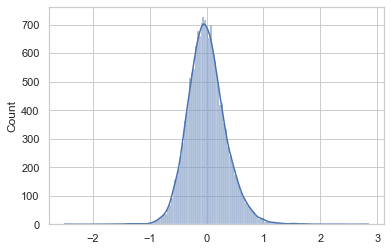

In [113]:
# Plot histogram of residuals
sns.histplot(residual2, kde = True)

**Oberservations:**

- We can see that the error terms are normally distributed. The assumption of normality is satisfied.

### 3. Linearity of Variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test this assumption, we'll plot the residuals and the fitted values and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

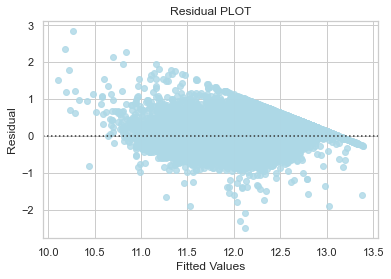

In [114]:
# Predicted values
fitted = ols_res_3.fittedvalues

sns.residplot(x = fitted, y = residual2, color = "lightblue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:**

- We can see that there is no pattern in the residuals vs fitted values scatter plot now, i.e., the linearity assumption is satisfied.

### 4. No heteroscedasticity

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [115]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [116]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train["median_house_value_log"], X3_train)

lzip(name, test)

[('F statistic', 1.0103962009959226), ('p-value', 0.31934990752267556)]

**Observation:**

- Since p-value > 0.05, we cannot reject the Null Hypothesis that the residuals are homoscedastic and the corresponding assumption is satisfied.

### Cross validation of model

Let's check the performance of the model using the cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data. 

In [119]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X3_train, y_train["median_house_value_log"], cv = 10)
cv_Score12 = cross_val_score(linearregression, X3_train, y_train["median_house_value_log"], cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.635 (+/- 0.034)
Mean Squared Error: 0.117 (+/- 0.009)


**Observation:**
- After applying cross-validation the model score has improved. We can compare it with the evaluation metric scores.

All the assumptions for the linear regression model are satisfied. With our model's adjusted R-squared value of around 0.64, we can capture **64% of the variation** in the data.

The p-values for the independent variables are less than 0.05 in our final model, indicating that they are statistically significant toward house value prediction.

Now, let's check and interpret the coefficients of the model.

### Getting the Coefficients of the Predictors

In [120]:
coef = ols_res_3.params
coef

const                         12.212884
housing_median_age             0.032731
median_income_log              0.384566
bedroom_ratio_log              0.085518
rooms_per_house_log            0.018879
ocean_proximity_INLAND        -0.439006
ocean_proximity_ISLAND         0.686035
ocean_proximity_NEAR BAY       0.052102
ocean_proximity_NEAR OCEAN     0.057378
dtype: float64

In [125]:
# Let us write the equation of the model
Equation = "median_house_value ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

median_house_value =	( 12.212884223374477 ) *  const + ( 0.032730787770280184 ) *  housing_median_age + ( 0.3845662693136654 ) *  median_income_log + ( 0.08551754622176796 ) *  bedroom_ratio_log + ( 0.018878511223703657 ) *  rooms_per_house_log + ( -0.4390063393416033 ) *  ocean_proximity_INLAND + ( 0.6860349419256595 ) *  ocean_proximity_ISLAND + ( 0.0521024178637583 ) *  ocean_proximity_NEAR BAY + ( 0.05737829286988223 ) *  ocean_proximity_NEAR OCEAN + 

**Interpreting the Regression Coefficients** 

The coefficients of regression indicate the effect of each predictor variable on the predicted value of the response variable, which in this case is the 'median_house_value'. Here's the interpretation of each coefficient:

**`housing_median_age:`** For a one-unit increase in 'housing_median_age', the predicted 'median_house_value' is expected to increase by approximately 0.0327 units, while holding other variables constant.

**`median_income_log:`** For a one-unit increase in the logarithm of 'median_income', the predicted 'median_house_value' is expected to increase by approximately 0.3846 units, while holding other variables constant.

**`bedroom_ratio_log:`** For a one-unit increase in the logarithm of 'bedroom_ratio', the predicted 'median_house_value' is expected to increase by approximately 0.0855 units, while holding other variables constant.

**`rooms_per_house_log:`** For a one-unit increase in the logarithm of 'rooms_per_house', the predicted 'median_house_value' is expected to increase by approximately 0.0189 units, while holding other variables constant.

**`ocean_proximity_INLAND:`** If a property is 'INLAND', the predicted 'median_house_value' is expected to decrease by approximately 0.4390 units compared to when it's '<1H Ocean', while holding other variables constant.

**`ocean_proximity_ISLAND:`** If a property is on an 'ISLAND', the predicted 'median_house_value' is expected to increase by approximately 0.6860 units compared to when it's '<1H Ocean', while holding other variables constant.

**`ocean_proximity_NEAR BAY:`** If a property is 'NEAR BAY', the predicted 'median_house_value' is expected to increase by approximately 0.0521 units compared to when it's '<1H Ocean', while holding other variables constant.

**`ocean_proximity_NEAR OCEAN:`** If a property is 'NEAR OCEAN', the predicted 'median_house_value' is expected to increase by approximately 0.0574 units compared to when it's '<1H Ocean', while holding other variables constant.

These interpretations are based on the assumption that other predictor variables remain constant while the specific predictor variable changes. Keep in mind that these interpretations assume a linear relationship between the predictors and the response.

__________

### Additional information that can be collected to gain better insights

Collecting additional data can provide more insights into the 'median_house_value' and improve the accuracy of predictive models. Here are some types of additional data that can be collected:

**1. Property Characteristics:** 
- Condition of the Property: Information about the condition of the property, such as whether it's new, renovated, or requires repairs.
- Amenities and Features: Details about special features like swimming pool, garden, parking, security systems, etc.

**2. Neighborhood Information:**
- Crime Rates: Data on crime rates in the neighborhood can impact property values.
- School Quality: Information about nearby schools and their quality can influence property prices.

**3. Market Demand and Supply:**
- Number of Listings: Data on the number of available properties for sale in the market.
- Number of Buyers: Information about the number of potential buyers looking for properties.

**4. Economic Indicators:**
- Unemployment Rate: Economic stability in the region can impact property values.
- Interest Rates: Mortgage interest rates can affect the affordability of homes.

**5. Environmental Factors:**
- Pollution Levels: Air and water quality in the area can influence property values.
- Natural Disaster Risk: Data on flood, earthquake, and other disaster risks.

**6. Historical Price Trends:**
- Past Sales Data: Historical data on property sales and their prices can provide insights into market trends.

**7. Local Infrastructure:**
- Public Transportation: Proximity to public transport hubs can affect property values.
- Nearby Facilities: Availability of shopping centers, hospitals, parks, etc.

**8. Zoning and Land Use:**
- Zoning Regulations: Data on local zoning regulations and land use restrictions.

**9. Seller Motivation:**
- Reason for Selling: Understanding why a property is being sold (e.g., relocation, downsizing) can influence negotiations.

**10. Property Valuation Reports:**
- Appraisal Reports: Official appraisals can provide an independent assessment of property value.
- Home Inspection Reports: Details about property condition from professional inspections.

**11. Macro-Economic Factors:**

- GDP Growth: Economic growth trends can impact property demand.
- Inflation Rate: Changes in consumer prices can affect real estate investment decisions.


Collecting and integrating these additional data points into our analysis can help us build more accurate predictive models and gain a deeper understanding of the factors influencing 'median_house_value'. However, it's important to carefully evaluate the quality and relevance of the data.